In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_data = pd.read_csv('C:/Users/mncedisi.mncwabe/Documents/Practices/bank_data.csv',delimiter = ';')

In [24]:
bank_data.head()

,acquire,atmct,adbdda,ddatot,ddadep,income,invest,atres,savbal
0,1,5,12987,4485,3785,440,0.0,13,0
1,0,0,31700,31391,34435,185,0.0,7,0
2,1,7,1142,2605,3536,275,0.0,6,40025
3,1,12,2592,14367,9730,360,0.0,2,0
4,1,2,3089,7115,5136,85,0.0,2,7084


In [6]:
bank_data.shape

(3000, 9)

In [7]:
bank_data.isnull().sum()

acquire    0
atmct      0
adbdda     0
ddatot     0
ddadep     0
income     0
invest     0
atres      0
savbal     0
dtype: int64

In [8]:
bank_data.describe()

,acquire,atmct,adbdda,ddatot,ddadep,income,invest,atres,savbal
count,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.500000,4.209000,6803.61700,7101.360000,5215.202000,393.841667,3440.241183,6.617000,5161.606333
std,0.500083,5.226958,16957.21267,21426.951161,16001.100782,271.822545,15670.408014,6.330956,16763.674487
min,0.000000,0.000000,-352.00000,0.000000,0.000000,35.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,236.00000,622.000000,579.750000,180.000000,0.000000,2.000000,0.000000
50%,0.500000,2.000000,1080.50000,1866.000000,1754.000000,345.000000,0.000000,4.000000,0.000000
75%,1.000000,7.000000,5290.00000,5030.250000,4283.750000,535.000000,0.000000,9.000000,814.000000
max,1.000000,30.000000,295834.00000,372395.000000,374170.000000,1500.000000,300000.000000,47.000000,259585.000000


In [4]:
# Take a sample of 2000 observations

bank = bank_data.sample(n=2000)

In [5]:
bank.shape

(2000, 9)

In [9]:
bank.describe()

,acquire,atmct,adbdda,ddatot,ddadep,income,invest,atres,savbal
count,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000
mean,0.501772,4.351899,6798.249620,7547.536203,5402.602532,393.744304,3581.629478,6.698734,4922.733165
std,0.500123,5.343065,16672.322673,23984.660623,17436.251915,271.901384,16091.244495,6.469856,15400.183258
min,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,251.000000,654.000000,622.000000,180.000000,0.000000,2.000000,0.000000
50%,1.000000,2.000000,1085.000000,1900.000000,1774.000000,350.000000,0.000000,4.000000,0.000000
75%,1.000000,7.000000,5495.500000,5008.000000,4259.000000,535.000000,0.000000,9.000000,850.000000
max,1.000000,30.000000,295834.000000,372395.000000,374170.000000,1500.000000,300000.000000,47.000000,245443.000000


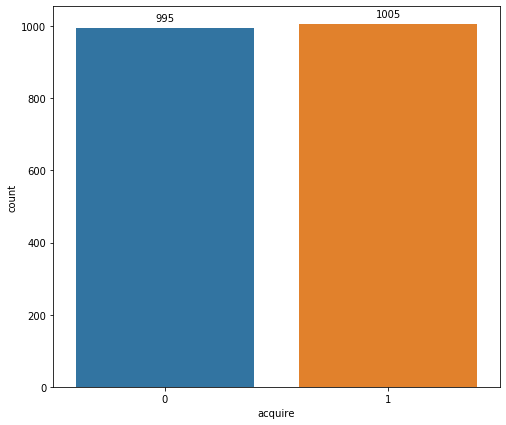

In [12]:
plt.figure(figsize = (8,7))
plot = sns.countplot(x = 'acquire',data = bank)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [15]:
# 1001 customers (which is 50.05%) will purchase the banking product and 999 (49.95%) will not
 

In [6]:
# drop rows with negative values on the adbdda column

bank = bank[~(bank['adbdda'] < 0)] 

In [7]:
bank.shape

(1975, 9)

In [12]:
# Group / make categories for investment

invest = bank['invest'].values
category = []
for num in invest:
    if num == 0:
        category.append("No investment")
    elif num < 10000:
        category.append("Small investor")
    elif num > 100000:
        category.append("Big investor")
    else:
        category.append("Medium investor")


In [13]:
[(i, category.count(i)) for i in set(category)]

[('No investment', 1744),
 ('Small investor', 65),
 ('Medium investor', 152),
 ('Big investor', 14)]

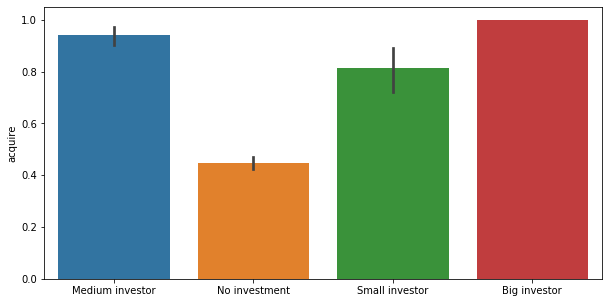

In [21]:
# now let's check whci group of investors are more likely to buy the bak product
plt.figure(figsize = (10,5))
sns.barplot(category,y='acquire',data=bank)

In [22]:
# From the above barplot, it's clear that Big investors(customers investing more than 100 000) and Medium investors  
# are more likely to purchase the bank product

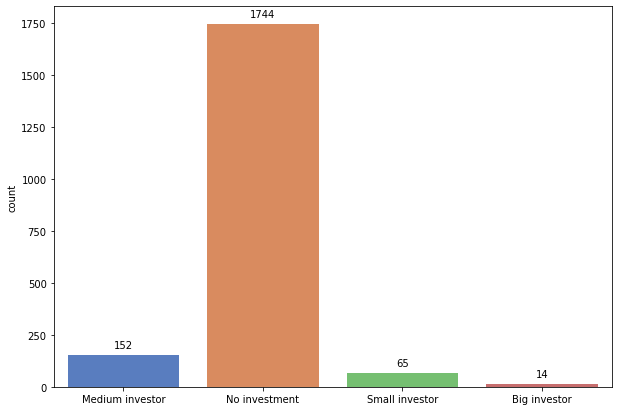

In [16]:
plt.figure(figsize=(10, 7))
plot = sns.countplot(category, palette="muted")

for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

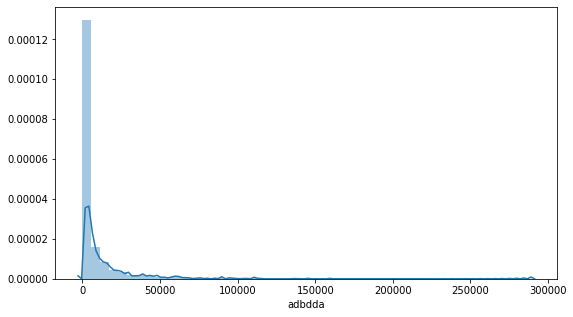

In [38]:
# Check distribution of variables 
plt.figure(figsize =(9,5))
sns.distplot(bank['adbdda'])

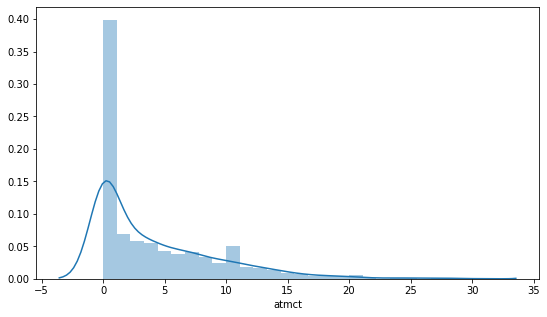

In [44]:
plt.figure(figsize =(9,5))
sns.distplot(bank['atmct'],kde = True)

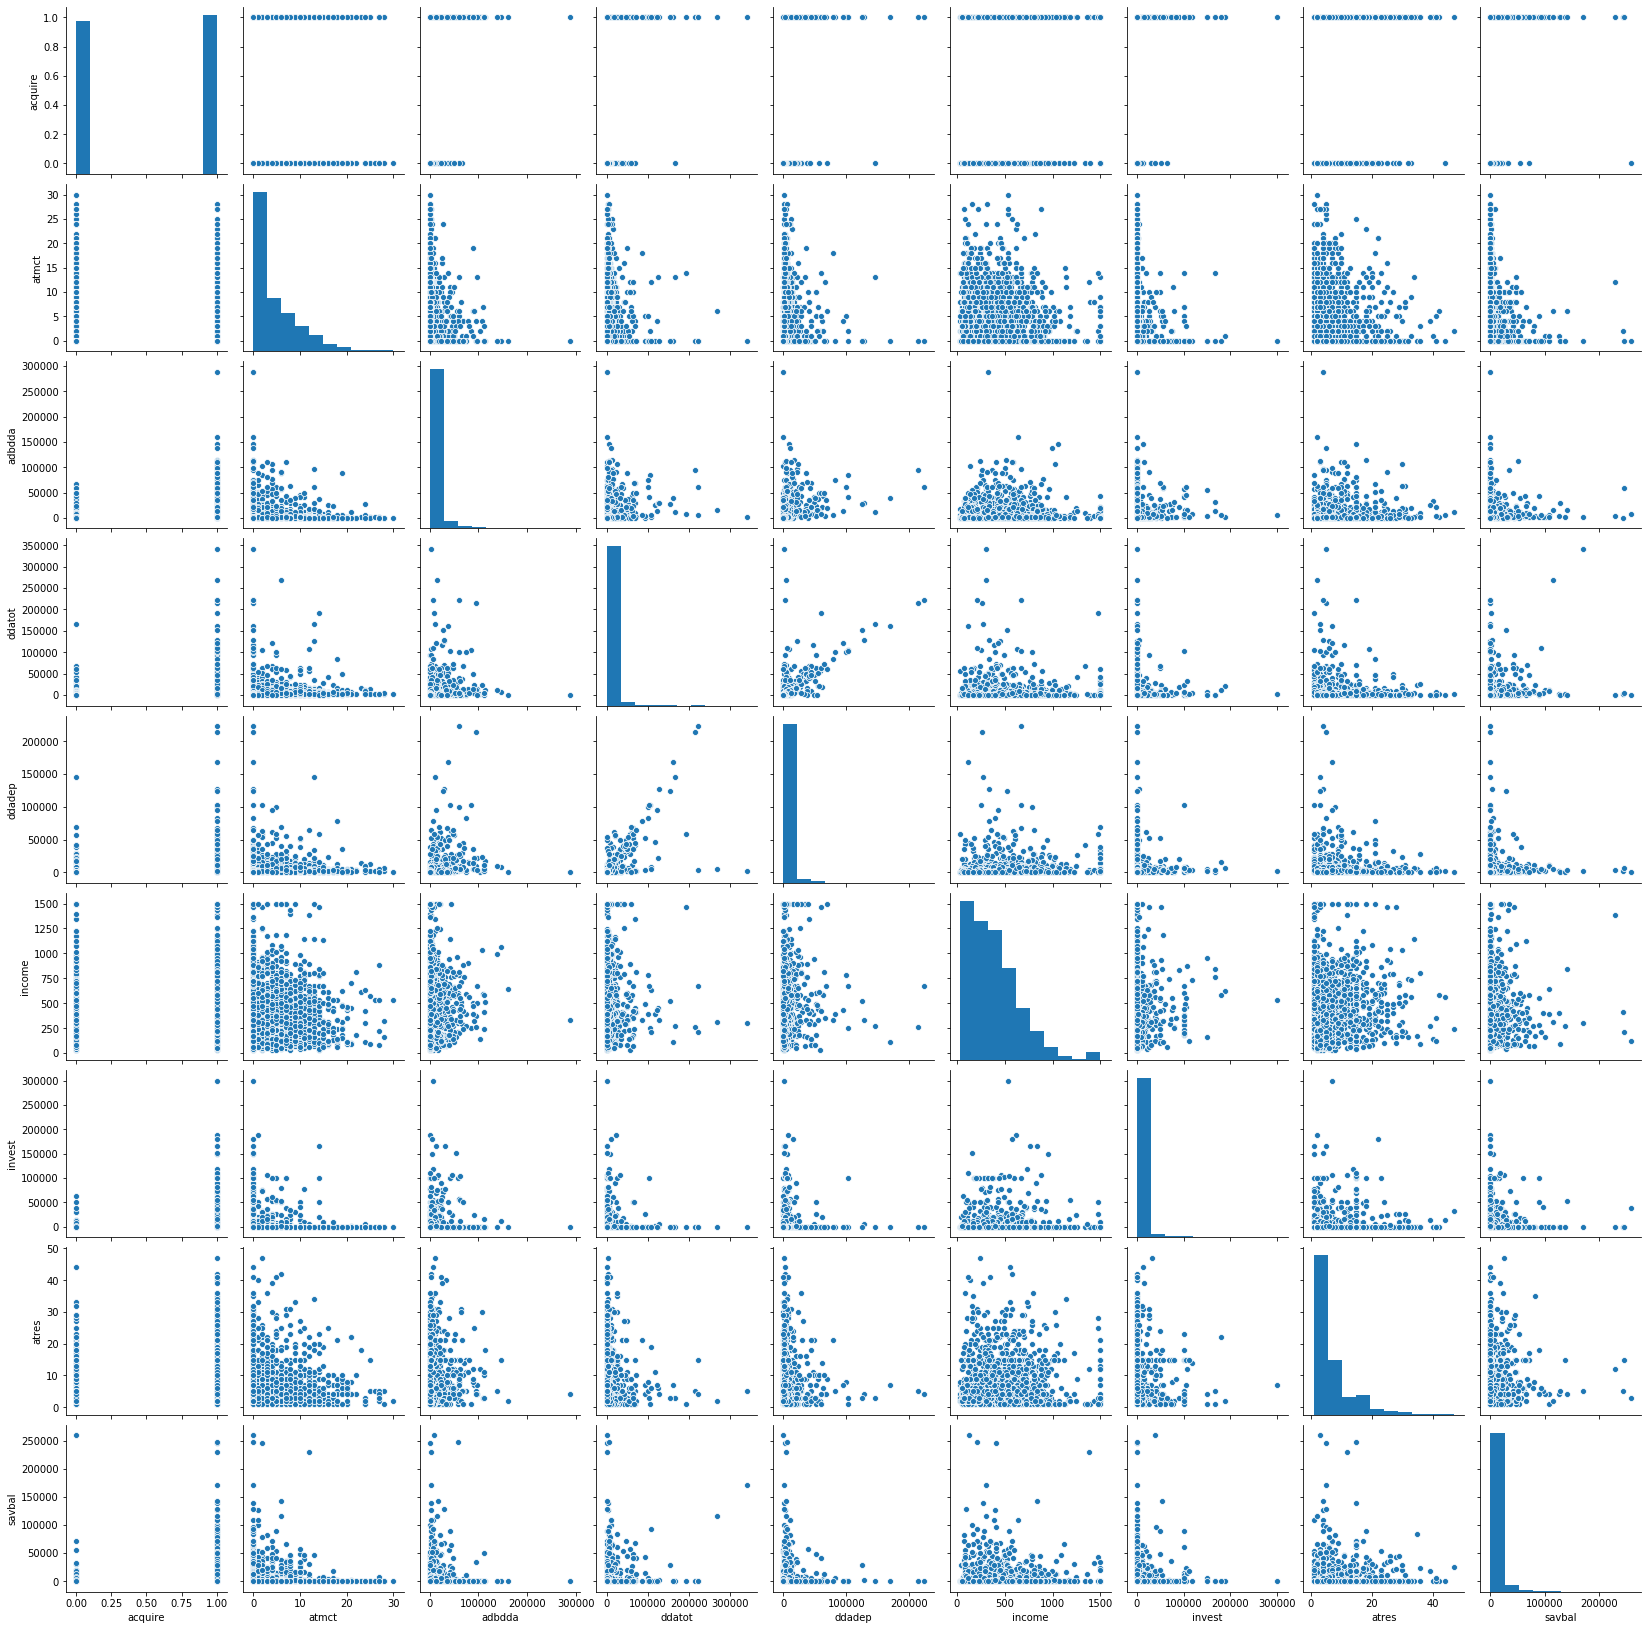

In [41]:
sns.pairplot(bank)

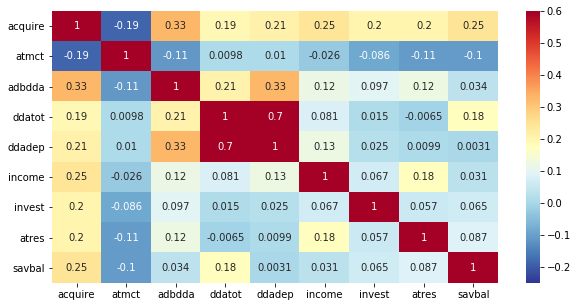

In [47]:
#heatmap to visualize correlation
plt.figure(figsize = (10,5))
sns.heatmap(bank.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

In [49]:
# pairplot and correlation table/heatmap indicate that adbdda, ddatot,income,invest,atres have positive correlation with 
# acquire
# ddadep and ddatot have a positive correlation with each othe, of 0.7

In [50]:
# noted that the most variables are skewed , so we can trandform them using log transformation
# import power Transformer to transform using log

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

pt.fit(bank[['adbdda']])

bank['log_adbdda'] = pt.transform(bank[['adbdda']])

In [51]:
bank.head()

,acquire,atmct,adbdda,ddatot,ddadep,income,invest,atres,savbal,log_adbdda
404,1,0,132,80,0,570,0.0,3,15522,-1.015322
425,0,0,676,0,0,60,0.0,2,0,-0.291532
1553,1,0,12750,2340,4862,740,68500.0,15,2220,1.132623
2914,1,1,1029,2242,1,110,0.0,3,23449,-0.097533
2170,0,5,35,1116,360,605,0.0,22,908,-1.565097


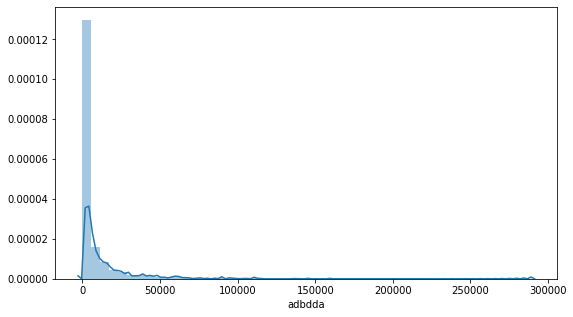

In [66]:
# adbdda before transformation
plt.figure(figsize =(9,5))
sns.distplot(bank['adbdda'],kde=True)

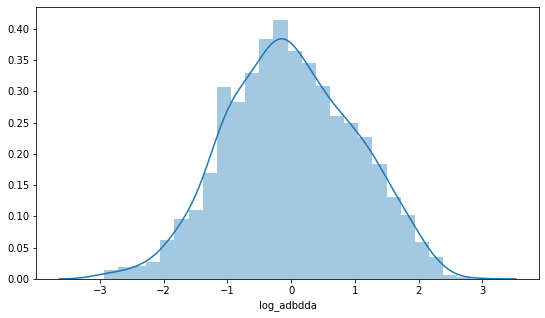

In [53]:
# check adbdda after log transformation
plt.figure(figsize =(9,5))
sns.distplot(bank['log_adbdda'])

In [56]:
# check slewness of the transformed adbdda
bank['log_adbdda'].skew()

-0.009272003898308635

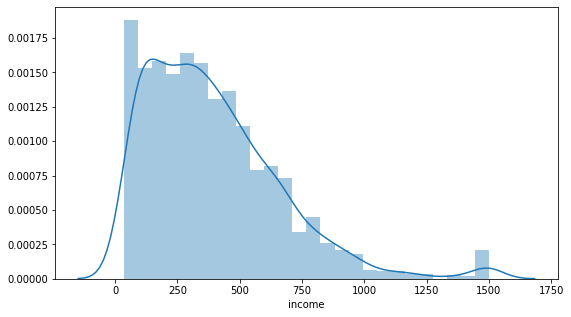

In [61]:
# check distribution of income
plt.figure(figsize=(9,5))
sns.distplot(bank['income'],kde=True)

In [63]:
# variable income is skewed to the left
pt = PowerTransformer()

pt.fit(bank[['income']])

bank['log_income'] = pt.transform(bank[['income']])

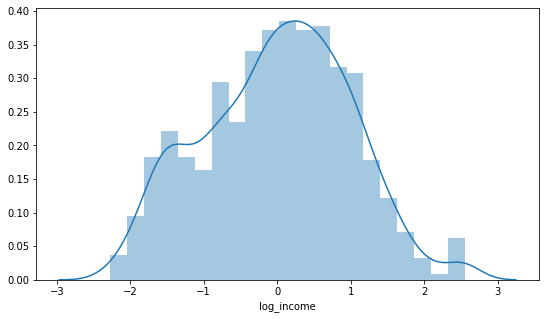

In [68]:
# check ditribution of income after applying log transformation
plt.figure(figsize=(9,5))
sns.distplot(bank['log_income'],kde=True)

In [72]:
# Transforming the rest of the variables
pt = PowerTransformer()
pt.fit(bank[['atmct']])
bank['log_atmct'] = pt.transform(bank[['atmct']])

pt.fit(bank[['ddatot']])
bank['log_ddatot'] = pt.transform(bank[['ddatot']])

pt.fit(bank[['ddadep']])
bank['log_ddadep'] = pt.transform(bank[['ddadep']])

pt.fit(bank[['invest']])
bank['log_invest'] = pt.transform(bank[['invest']])

pt.fit(bank[['atres']])
bank['log_atres'] = pt.transform(bank[['atres']])

pt.fit(bank[['savbal']])
bank['log_savbal'] = pt.transform(bank[['savbal']])

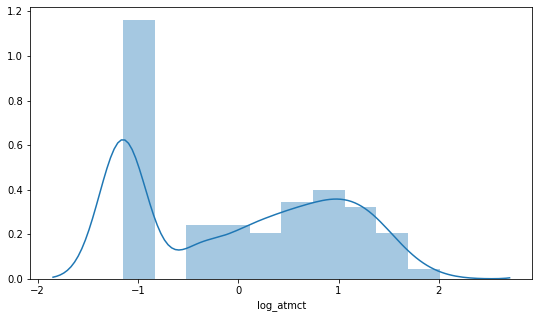

In [88]:
plt.figure(figsize=(9,5))
sns.distplot(bank['log_atmct'])

In [71]:
bank.head()

,acquire,atmct,adbdda,ddatot,ddadep,income,invest,atres,savbal,log_adbdda,log_income
404,1,0,132,80,0,570,0.0,3,15522,-1.015322,0.813468
425,0,0,676,0,0,60,0.0,2,0,-0.291532,-1.842060
1553,1,0,12750,2340,4862,740,68500.0,15,2220,1.132623,1.238809
2914,1,1,1029,2242,1,110,0.0,3,23449,-0.097533,-1.278368
2170,0,5,35,1116,360,605,0.0,22,908,-1.565097,0.907977


In [87]:
bank['log_atmct'].skew()

0.0692510649171338

In [90]:
# Now let's drop the other variables and leave the transformed variables

bank = bank.drop(['adbdda','ddatot','atmct','ddadep','income','invest','savbal','atres'],axis=1)

In [91]:
bank.head()

,acquire,log_adbdda,log_income,log_atmct,log_ddatot,log_ddadep,log_invest,log_atres,log_savbal
404,1,-1.015322,0.813468,-1.149949,-1.269117,-1.987837,-0.371471,-0.501207,1.536571
425,0,-0.291532,-1.842060,-1.149949,-2.223081,-1.987837,-0.371471,-0.991205,-0.714676
1553,1,1.132623,1.238809,-1.149949,0.097077,0.629665,2.693105,1.373950,1.409168
2914,1,-0.097533,-1.278368,-0.388150,0.074567,-1.899489,-0.371471,-0.501207,1.556141
2170,0,-1.565097,0.907977,0.681183,-0.271020,-0.663397,-0.371471,1.755032,1.324632


In [92]:
bank.shape

(1971, 9)

In [120]:
# -------------Time to build Machine Learning Model----------

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [94]:
X = bank.drop(['acquire'],axis=1)
y = bank['acquire']

In [113]:
#------Split the data using 70/30 split--------

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

In [114]:
# Logistic Regression
lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)*100

82.9391891891892

In [128]:
# Decision Tree
dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(X_train,y_train)
dt.score(X_test,y_test)*100

76.6891891891892

In [116]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

83.9527027027027

In [117]:
#Neural Network
nnt = MLPClassifier()
nnt.fit(X_train,y_train)
nnt.score(X_test,y_test)*100

81.08108108108108

In [118]:
# GradientBoosting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb.score(X_test,y_test)*100

83.44594594594594

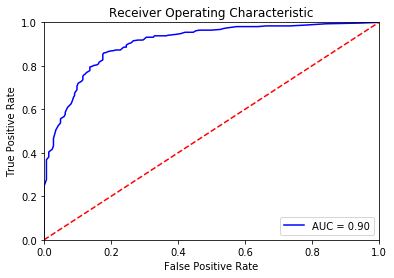

In [126]:
#ROC CURVE FOR THE MODELS
probs = rf.predict_proba(X_test)  #for random forest
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

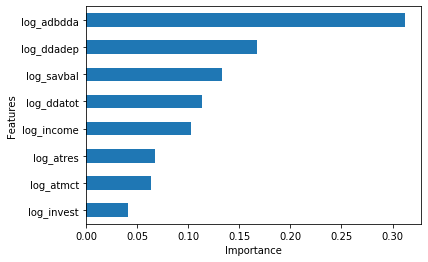

In [136]:
#Feature importance of the selected model (random forest)
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(10).plot(kind='barh')
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()